## 导入实验所用的包

In [1]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpmax, fpgrowth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
import warnings
from IPython.core.interactiveshell import InteractiveShell

warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"


## 进行数据的读取和预处理--将数据存到列表中

In [2]:
f = open(r"C:\Users\38061\Jupyter_Notebook\shujuwajue\TheTwo\数据集-T10I4D100K.txt")  
line = f.readline() 
lines = []
while line:  
    line_data = line.split()  
    lines.append(line_data)
    line = f.readline()  
f.close()
data = lines
# data

## 寻找数据频繁项集

### 利用Apriori算法进行寻找

In [3]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)


frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)

print('以下为使用Apriori算法进行寻找频繁项集的结果')
frequent_itemsets

以下为使用Apriori算法进行寻找频繁项集的结果


,support,itemsets
0,0.02680,(112)
1,0.02193,(116)
2,0.03415,(12)
3,0.04973,(120)
4,0.02641,(132)
...,...,...
150,0.03626,(956)
151,0.02732,(960)
152,0.03921,(966)
153,0.02086,(970)


### 利用FP-Growth算法寻找

In [4]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)


frequent_itemsets = fpgrowth(df, min_support=0.02, use_colnames=True)

print('以下为使用FP-Growth算法进行寻找频繁项集的结果')
frequent_itemsets

以下为使用FP-Growth算法进行寻找频繁项集的结果


,support,itemsets
0,0.07828,(368)
1,0.03982,(538)
2,0.03771,(775)
3,0.03085,(825)
4,0.02783,(561)
...,...,...
150,0.03281,(510)
151,0.02022,(826)
152,0.02693,(661)
153,0.02492,(634)


In [5]:
times1 = []
times2 = []
x = np.arange(0.03, 0.006, -0.001)
for i in x:
    start=time.time()
    fi_1 = apriori(df, min_support=i, use_colnames=True)
    end=time.time()
    times1.append(end-start)
    
    start=time.time()
    fi_2 = fpgrowth(df, min_support=i, use_colnames=True)
    end=time.time()
    times2.append(end-start)
    
    

<Figure size 10000x5000 with 0 Axes>

Text(0.5, 1.0, '两种算法在使用不同的置信度下计算所用的时间')

Text(0.5, 0, '置信度的取值')

Text(0, 0.5, '计算所用的时间')

(array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

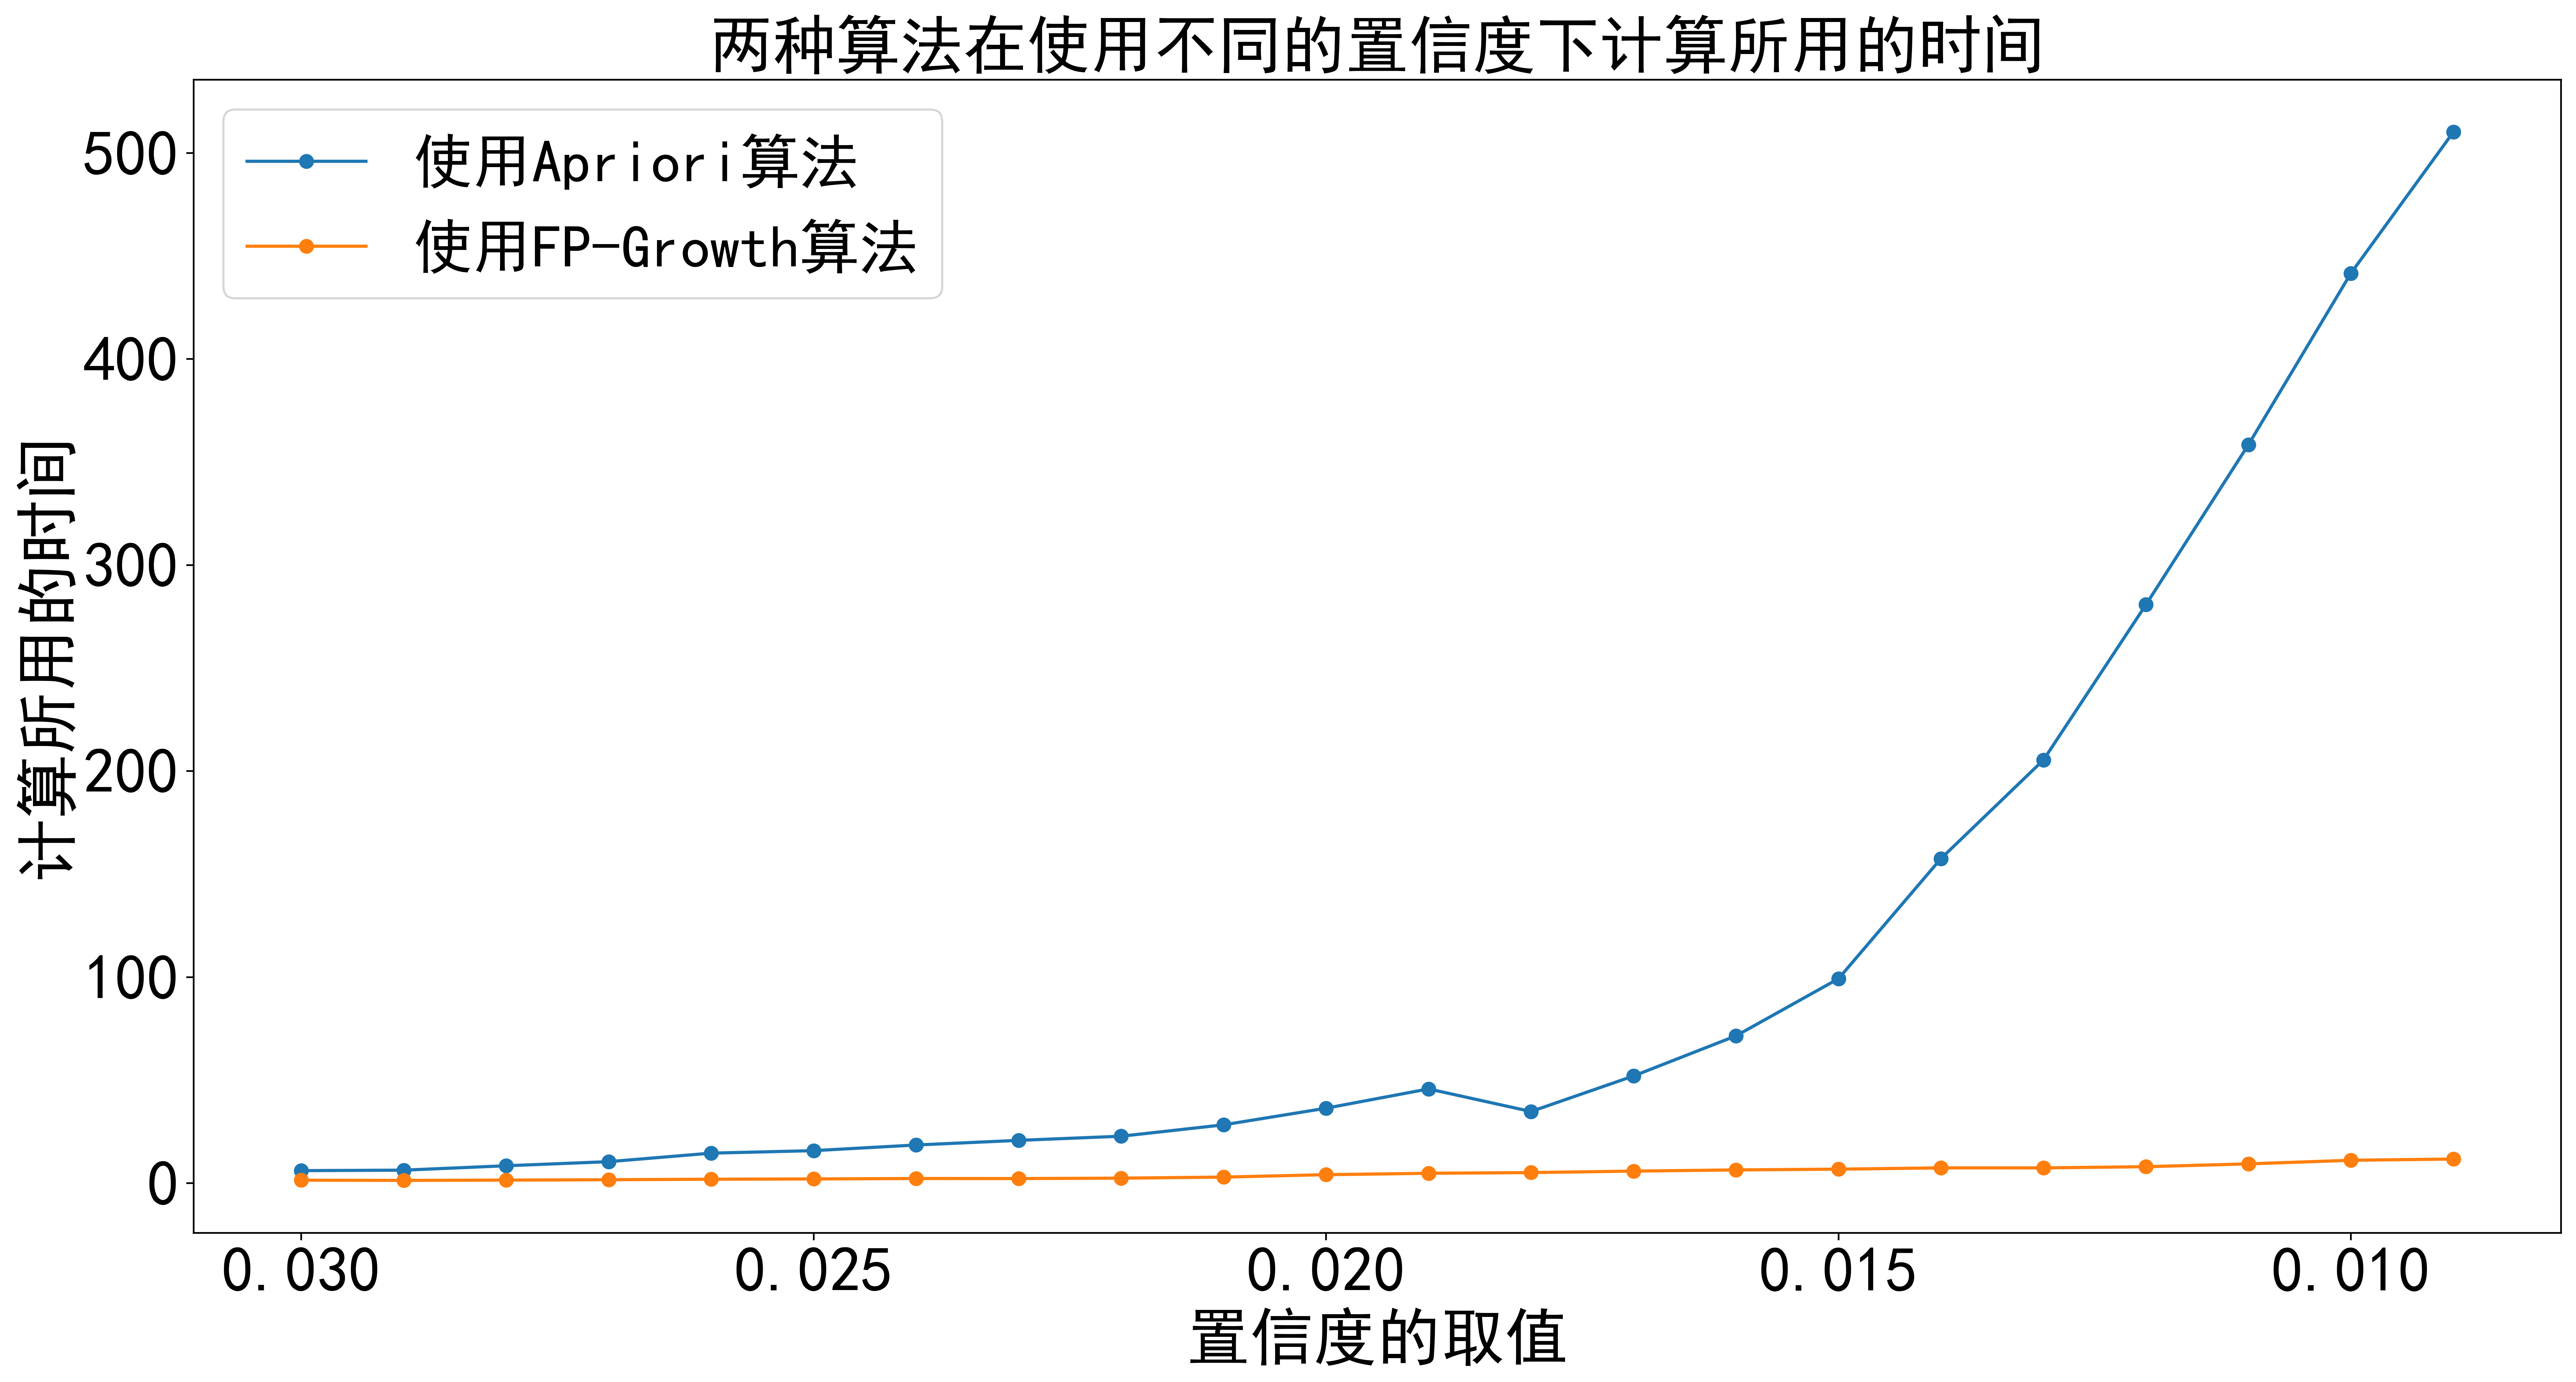

In [6]:
# x = np.arange(0.03, 0.009, -0.001)
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.figure(dpi=500, figsize=[20, 10])
plt.plot(x,times1, marker='o', ls='-',label="使用Apriori算法")
plt.plot(x,times2, marker='o', ls='-',label="使用FP-Growth算法")
plt.gca().invert_xaxis()
plt.legend(fontsize=28)
plt.title("两种算法在使用不同的置信度下计算所用的时间", fontsize=30)
plt.xlabel("置信度的取值", fontsize=30)
plt.ylabel("计算所用的时间", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

### 结论：两种算法进行比较，其结果相同，但是FP-Growth算法明显快于Apriori算法，因此以下均使用FP-Growth算法

## 计算闭项集

In [7]:
	import sys
	import time

	def find_frequent_1_itemsets(D, minsupport):
	    L1 = []
	    C1 = []
	    cnt = {}
	    for transcation in D:
	        for item in transcation:
	            if not (item=='\n' or item==' '):
	                if not [item] in C1:
	                    C1.append([item])
	                    cnt[item] = 1
	                else:
	                    cnt[item] += 1
	    for transcation in C1:
	        for item in transcation:
	            if cnt[item] >= minsupport:
	                L1.append(transcation)               
	    L1.sort()
	    return L1  #return all itemset in the same level
	
	def aproiri_gen(L, L1, D , minsupport): #生成新一层的所有节点
	    res = []
	    for i in range(len(L)):
	        for j in range(len(L1)):
	            if L[i][-1] < L1[j][0]:   #L[i][-1]是L列表中，第i项最后一个字母
	                candidate = list(set(L[i]).union(set(L1[j]))) #union             
	                cnt = 0
	                for transcation in D: 
	                    if compareList(candidate, transcation):
	                        cnt += 1 
	                if cnt >= minsupport:
	                    res.append(candidate)
	
	    return res
	
	def compareList(l1, l2): #l1的每一项都在l2中
	    for item in l1:
	        if item not in l2:
	            return False
	    return True
	                
	def Aproiri(D, minsupport):
	    L = []
	    close=[]
	    L1 = find_frequent_1_itemsets(D, minsupport) #第一层的候选项集
	    #print('第 1 层的候选项集为：',L1)
	    L.append([])
	    L.append(L1)
	    
	    for k in range(2,len(L1)):
	        Lk = []
	        if len(L[k-1]) == 0:
	            break
	        Ck = aproiri_gen(L[k-1] ,L1,D,minsupport)
	        #print("第",k,"层的候选项集为:" , Ck)
	        L.append(Ck)
	    
	    for i in range(len(L)):
	        for item in L[i]:
	            close.append(item)
	    #print("频繁项集个数为：",len(close)-1)
	
	      #  maximal.append(maximalE)
	        #close.append(closeE)
	    for k in range(2,len(L1)):
	        if len(L[k-1]) == 0:
	            break
	        for transcation in L[k-1]:
	            cnt = 0
	            for item in D:
	                if compareList(transcation, item):
	                    cnt +=1
	            for candidate in L[k]:
	                if compareList(transcation, candidate):
	                    cnm = 0
	                    for item in D:
	                        if compareList(candidate, item):
	                            cnm +=1
	                    if cnt <= cnm:
	                        if transcation in close:
	                            close.remove(transcation)
	                            
	    return L,close
	#test
	start=time.time()
	D = data
	
	L ,close = Aproiri(D, 2000)
	print ("频繁项集为：",L)
	#print ("闭合项集个数为：",len(close))
	print("闭合项集为：",close)
	end=time.time()
	print ('程序运行时间为：',end-start,'s')

频繁项集为： [[], [['112'], ['116'], ['12'], ['120'], ['132'], ['140'], ['145'], ['151'], ['161'], ['175'], ['177'], ['183'], ['192'], ['196'], ['204'], ['205'], ['21'], ['210'], ['217'], ['229'], ['236'], ['239'], ['242'], ['27'], ['274'], ['276'], ['279'], ['280'], ['283'], ['285'], ['296'], ['32'], ['334'], ['346'], ['349'], ['350'], ['354'], ['362'], ['368'], ['373'], ['38'], ['381'], ['387'], ['39'], ['390'], ['392'], ['401'], ['411'], ['413'], ['419'], ['438'], ['450'], ['460'], ['470'], ['471'], ['472'], ['477'], ['48'], ['480'], ['487'], ['489'], ['494'], ['509'], ['510'], ['522'], ['523'], ['526'], ['529'], ['538'], ['54'], ['541'], ['548'], ['561'], ['569'], ['57'], ['571'], ['579'], ['581'], ['593'], ['597'], ['598'], ['6'], ['606'], ['614'], ['617'], ['620'], ['631'], ['634'], ['638'], ['653'], ['661'], ['663'], ['674'], ['675'], ['676'], ['682'], ['684'], ['69'], ['692'], ['694'], ['70'], ['71'], ['72'], ['720'], ['722'], ['73'], ['738'], ['744'], ['75'], ['752'], ['758'], ['766

## 计算最大频繁项集（在min_support=0.001计算）

In [8]:
fi2 = fpgrowth(df, min_support=0.001, use_colnames=True)
#frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.01, use_colnames=True)
print('以下为support大于0.001的情况下频繁项集')
fi2

以下为support大于0.001的情况下频繁项集


,support,itemsets
0,0.07828,(368)
1,0.03982,(538)
2,0.03771,(775)
3,0.03085,(825)
4,0.02783,(561)
...,...,...
27527,0.00182,"(886, 38, 259, 640, 890, 806)"
27528,0.00181,"(886, 38, 259, 722, 890, 806)"
27529,0.00180,"(886, 38, 259, 722, 640, 806)"
27530,0.00179,"(886, 38, 259, 722, 640, 890, 806)"


In [9]:
fi2['length'] = fi2['itemsets'].apply(lambda x: len(x))
print('以下为support大于0.001的情况下频繁项集及其长度')
fi2

以下为support大于0.001的情况下频繁项集及其长度


,support,itemsets,length
0,0.07828,(368),1
1,0.03982,(538),1
2,0.03771,(775),1
3,0.03085,(825),1
4,0.02783,(561),1
...,...,...,...
27527,0.00182,"(886, 38, 259, 640, 890, 806)",6
27528,0.00181,"(886, 38, 259, 722, 890, 806)",6
27529,0.00180,"(886, 38, 259, 722, 640, 806)",6
27530,0.00179,"(886, 38, 259, 722, 640, 890, 806)",7


In [10]:
fi2_max = fpmax(df, min_support=0.001, use_colnames=True)
print('以下为support大于0.001的情况下最大频繁项集')
fi2_max

fi2_max['length'] = fi2_max['itemsets'].apply(lambda x: len(x))
print('以下为support大于0.001的情况下最大频繁项集及其长度')
fi2_max

以下为support大于0.001的情况下最大频繁项集


,support,itemsets
0,0.00102,(729)
1,0.00102,(330)
2,0.00103,"(490, 856, 906)"
3,0.00109,(199)
4,0.00109,(102)
...,...,...
4049,0.00294,"(829, 722)"
4050,0.00328,"(766, 722)"
4051,0.00392,"(368, 722)"
4052,0.00317,"(766, 529)"


以下为support大于0.001的情况下最大频繁项集及其长度


,support,itemsets,length
0,0.00102,(729),1
1,0.00102,(330),1
2,0.00103,"(490, 856, 906)",3
3,0.00109,(199),1
4,0.00109,(102),1
...,...,...,...
4049,0.00294,"(829, 722)",2
4050,0.00328,"(766, 722)",2
4051,0.00392,"(368, 722)",2
4052,0.00317,"(766, 529)",2


## 挖掘关联规则

### 分别使用confidence和lift指标

In [11]:
rules1=association_rules(fi2, metric="confidence", min_threshold=0.997)
print('以下为使用confidence指标且大于0.997情况下的关联规则')
rules1

rules2 = association_rules(fi2, metric="lift", min_threshold=700)
print('以下为使用lift指标且大于700情况下的关联规则')
rules2



以下为使用confidence指标且大于0.997情况下的关联规则


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(145, 489, 283)",(674),0.00248,0.02527,0.00248,1.0,39.572616,0.002417,inf
1,"(145, 39, 489, 283)",(674),0.00245,0.02527,0.00245,1.0,39.572616,0.002388,inf
2,"(145, 487, 422)",(885),0.00138,0.03043,0.00138,1.0,32.862307,0.001338,inf
3,"(487, 354, 422)",(885),0.00133,0.03043,0.00133,1.0,32.862307,0.001290,inf
4,"(145, 487, 354, 422)",(885),0.00131,0.03043,0.00131,1.0,32.862307,0.001270,inf
...,...,...,...,...,...,...,...,...,...
882,"(72, 841, 749, 351)","(268, 545)",0.00114,0.00119,0.00114,1.0,840.336134,0.001139,inf
883,"(749, 351, 72, 606, 841)",(545),0.00113,0.00119,0.00113,1.0,840.336134,0.001129,inf
884,"(749, 351, 72, 545, 606, 841)",(268),0.00113,0.00885,0.00113,1.0,112.994350,0.001120,inf
885,"(749, 351, 72, 606, 268, 841)",(545),0.00113,0.00119,0.00113,1.0,840.336134,0.001129,inf


以下为使用lift指标且大于700情况下的关联规则


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(447, 594)","(809, 849)",0.00128,0.00119,0.00109,0.851562,715.598739,0.001088,6.728825
1,"(809, 849)","(447, 594)",0.00119,0.00128,0.00109,0.915966,715.598739,0.001088,11.884768
2,"(529, 809, 594)","(447, 849)",0.00117,0.00123,0.00107,0.914530,743.520256,0.001069,11.685609
3,"(529, 809, 849)","(447, 594)",0.00114,0.00128,0.00107,0.938596,733.278509,0.001069,16.264869
4,"(447, 529, 809)","(849, 594)",0.00122,0.00121,0.00107,0.877049,724.834033,0.001069,8.123492
...,...,...,...,...,...,...,...,...,...
4207,(476),"(145, 319, 914)",0.00133,0.00104,0.00102,0.766917,737.420474,0.001019,4.285861
4208,"(536, 914)",(476),0.00104,0.00133,0.00100,0.961538,722.961249,0.000999,25.965420
4209,(476),"(536, 914)",0.00133,0.00104,0.00100,0.751880,722.961249,0.000999,4.026112
4210,"(536, 319)",(476),0.00105,0.00133,0.00100,0.952381,716.075904,0.000999,20.972070


### 联合使用confidence与lift指标

In [12]:
rules = rules1.drop(rules1[rules1.lift <700].index)
#设置标题索引并打印结果
rules.rename(columns = {'antecedents':'from','consequents':'to','support':'support','confidence':'confidence'},inplace = True)
rules = rules[['from','to','support','confidence','lift']]
print('以下为联合使用两种指标的关联规则')
rules

以下为联合使用两种指标的关联规则


,from,to,support,confidence,lift
698,"(720, 639, 992)","(331, 335)",0.00121,1.0,781.250000
701,"(720, 509, 639)","(331, 335)",0.00121,1.0,781.250000
705,"(720, 509, 992, 639)","(331, 335)",0.00120,1.0,781.250000
713,"(720, 509, 992)","(331, 335)",0.00122,1.0,781.250000
810,"(268, 351, 841)",(545),0.00117,1.0,840.336134
814,"(268, 606, 841)",(545),0.00117,1.0,840.336134
816,"(606, 351, 841)",(545),0.00116,1.0,840.336134
818,"(841, 268, 606, 351)",(545),0.00116,1.0,840.336134
819,"(841, 606, 351)","(268, 545)",0.00116,1.0,840.336134
822,"(72, 268, 606)",(545),0.00117,1.0,840.336134
